This part is mainly for neural netword analysis, and it's the continuous of previous blabla car_coding

In [ ]:
import pandas as pd
df = pd.read_excel('C:\\Users\\user\\Downloads\\Blablacar data_Paris-Lyon_individual projects.xlsx')

In [52]:
df = pd.get_dummies(df, columns = ['departure'],prefix = 'depart_lyon')

In [53]:
df.columns

Index(['driverid', 'offerid', 'arrival', 'tripdistance', 'offer date',
       'departure date', 'price', 'nboffers', 'photo', 'driverstatus', 'music',
       'talk', 'pet', 'smoking', 'manualreservation', 'roundtrip', 'carrating',
       'detourtime', 'pageview', 'maxpricedepd', 'minpricedepd',
       'meanpricedepd', 'sdpricedepd', 'seatsincar', 'seatsold', 'firstname',
       'driver country', 'nbevaluation', 'age', 'gender', 'depart_lyon_Lyon',
       'depart_lyon_Paris'],
      dtype='object')

In [83]:
df = df[['tripdistance','price', 'nboffers', 'photo', 'driverstatus', 'music', 'talk', 'pet','smoking', 'manualreservation', 'roundtrip','carrating', 'detourtime',
       'pageview', 'maxpricedepd', 'minpricedepd', 'meanpricedepd',
       'seatsincar', 'seatsold',
       'nbevaluation', 'age', 'gender', 'depart_lyon_Lyon']]

In [84]:
import keras
from keras.layers import Dense
from keras.models import Sequential

In [85]:
import numpy as np
import pandas as pd
predictors = df.drop(['price'], axis=1).values
predictors
price = df.price.values
price

array([25, 30, 30, ..., 30, 25, 38], dtype=int64)

In [86]:
df.head()

,tripdistance,price,nboffers,photo,driverstatus,music,talk,pet,smoking,manualreservation,roundtrip,carrating,detourtime,pageview,maxpricedepd,minpricedepd,meanpricedepd,seatsincar,seatsold,nbevaluation,age,gender,depart_lyon_Lyon
0,462,25,629,0,2,1,1,0,0,0,0,0,15,42,48,15,29.266666,0,0,1,28,1,0
1,435,30,731,0,1,1,1,0,0,0,0,4,15,62,52,19,29.657675,6,0,0,52,0,1
2,464,30,721,0,1,1,1,0,0,0,0,4,15,14,52,17,29.499228,6,0,0,52,0,0
3,511,49,801,0,1,1,1,0,0,0,0,4,15,18,49,15,29.816593,6,1,2,52,0,1
4,516,48,757,0,2,1,1,0,0,0,0,4,15,2,73,20,29.101709,6,2,2,52,0,1


In [87]:
df.isna().sum()

tripdistance         0
price                0
nboffers             0
photo                0
driverstatus         0
music                0
talk                 0
pet                  0
smoking              0
manualreservation    0
roundtrip            0
carrating            0
detourtime           0
pageview             0
maxpricedepd         0
minpricedepd         0
meanpricedepd        0
seatsincar           0
seatsold             0
nbevaluation         0
age                  0
gender               0
depart_lyon_Lyon     0
dtype: int64

In [88]:
price

array([25, 30, 30, ..., 30, 25, 38], dtype=int64)

In [115]:
from keras.callbacks import EarlyStopping
n_cols = predictors.shape[1]
model = Sequential()
model.add(Dense(150, activation='relu', input_shape = (n_cols,)))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(1))
early_stopping_monitor = EarlyStopping(patience = 3)
model.compile(optimizer='adam', loss='mean_squared_error', metrics =['accuracy'])

In [116]:
model.fit(predictors,price,epochs=15,validation_split=0.2, callbacks=[early_stopping_monitor])

Train on 78100 samples, validate on 19525 samples
Epoch 1/15
78100/78100 [==============================] - 6s 79us/step - loss: 16.4501 - accuracy: 0.1446 - val_loss: 12.9519 - val_accuracy: 0.2035
Epoch 2/15
78100/78100 [==============================] - 6s 74us/step - loss: 12.8090 - accuracy: 0.1555 - val_loss: 13.0590 - val_accuracy: 0.1010
Epoch 3/15
78100/78100 [==============================] - 6s 74us/step - loss: 12.4719 - accuracy: 0.1624 - val_loss: 12.4840 - val_accuracy: 0.1552
Epoch 4/15
78100/78100 [==============================] - 6s 75us/step - loss: 12.3710 - accuracy: 0.1644 - val_loss: 13.9551 - val_accuracy: 0.0822
Epoch 5/15
78100/78100 [==============================] - 6s 77us/step - loss: 12.1704 - accuracy: 0.1663 - val_loss: 12.3782 - val_accuracy: 0.1492
Epoch 6/15
78100/78100 [==============================] - 6s 77us/step - loss: 12.0029 - accuracy: 0.1661 - val_loss: 14.8317 - val_accuracy: 0.0715
Epoch 7/15
78100/78100 [==============================] 

In [125]:
from keras.callbacks import EarlyStopping
n_cols = predictors.shape[1]
model_2 = Sequential()
model_2.add(Dense(200, activation='relu', input_shape = (n_cols,)))
model_2.add(Dense(200, activation='relu'))
model_2.add(Dense(100, activation='relu'))
model_2.add(Dense(1))
early_stopping_monitor = EarlyStopping(patience = 3)
model_2.compile(optimizer='adam', loss='mean_squared_error', metrics =['accuracy'])

In [126]:
model_2.fit(predictors,price,epochs = 15, validation_split = 0.2, callbacks = [early_stopping_monitor])

Train on 78100 samples, validate on 19525 samples
Epoch 1/15
78100/78100 [==============================] - 8s 97us/step - loss: 22.2970 - accuracy: 0.1397 - val_loss: 14.5471 - val_accuracy: 0.0829
Epoch 2/15
78100/78100 [==============================] - 7s 93us/step - loss: 13.1851 - accuracy: 0.1531 - val_loss: 13.0128 - val_accuracy: 0.1235
Epoch 3/15
78100/78100 [==============================] - 7s 93us/step - loss: 12.6735 - accuracy: 0.1621 - val_loss: 15.3511 - val_accuracy: 0.0739
Epoch 4/15
78100/78100 [==============================] - 12s 149us/step - loss: 12.2910 - accuracy: 0.1658 - val_loss: 12.4828 - val_accuracy: 0.1468
Epoch 5/15
78100/78100 [==============================] - 15s 186us/step - loss: 12.1287 - accuracy: 0.1666 - val_loss: 12.8543 - val_accuracy: 0.1056
Epoch 6/15
78100/78100 [==============================] - 8s 102us/step - loss: 11.9649 - accuracy: 0.1656 - val_loss: 13.0386 - val_accuracy: 0.1255
Epoch 7/15
78100/78100 [===========================

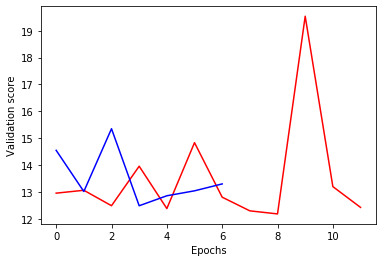

In [128]:
import matplotlib.pyplot as plt
plt.plot(model.history.history['val_loss'],'r',model_2.history.history['val_loss'],'b')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.show()

In [117]:
model.predict(predictors)

array([[27.995203],
       [28.561615],
       [29.508394],
       ...,
       [27.914726],
       [27.717625],
       [28.817904]], dtype=float32)